<a href="https://www.kaggle.com/code/machineelearning1/new-york-city-taxi-demand-anomaly-detection?scriptVersionId=161054415" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nab/README.md
/kaggle/input/nab/realKnownCause/realKnownCause/rogue_agent_key_updown.csv
/kaggle/input/nab/realKnownCause/realKnownCause/ec2_request_latency_system_failure.csv
/kaggle/input/nab/realKnownCause/realKnownCause/ambient_temperature_system_failure.csv
/kaggle/input/nab/realKnownCause/realKnownCause/nyc_taxi.csv
/kaggle/input/nab/realKnownCause/realKnownCause/rogue_agent_key_hold.csv
/kaggle/input/nab/realKnownCause/realKnownCause/machine_temperature_system_failure.csv
/kaggle/input/nab/realKnownCause/realKnownCause/cpu_utilization_asg_misconfiguration.csv
/kaggle/input/nab/realTraffic/realTraffic/TravelTime_387.csv
/kaggle/input/nab/realTraffic/realTraffic/speed_6005.csv
/kaggle/input/nab/realTraffic/realTraffic/speed_t4013.csv
/kaggle/input/nab/realTraffic/realTraffic/occupancy_t4013.csv
/kaggle/input/nab/realTraffic/realTraffic/speed_7578.csv
/kaggle/input/nab/realTraffic/realTraffic/occupancy_6005.csv
/kaggle/input/nab/realTraffic/realTraffic/TravelTime_451.

In [2]:
import pandas as pd
df = pd.read_csv("../input/nab/realKnownCause/realKnownCause/nyc_taxi.csv")
df.head(10).style.set_caption('New York City Taxi Demand')
#data was collected every 30min

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820
5,2014-07-01 02:30:00,2873
6,2014-07-01 03:00:00,2369
7,2014-07-01 03:30:00,2064
8,2014-07-01 04:00:00,2221
9,2014-07-01 04:30:00,2158


In [3]:
df.describe()

,value
count,10320.000000
mean,15137.569380
std,6939.495808
min,8.000000
25%,10262.000000
50%,16778.000000
75%,19838.750000
max,39197.000000


Feature Engineering

In [4]:
#datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

df['DayOfTheWeek'] = df['timestamp'].dt.dayofweek
df['WeekEnd'] = (df['DayOfTheWeek'] > 5).astype(int)
df["hour"] = df.timestamp.dt.hour
df["minute"] = df.timestamp.dt.minute

df['Day'] = df['timestamp'].dt.weekday
df['Month'] = df['timestamp'].dt.month
df['Year'] = df['timestamp'].dt.year
df['Month_day'] = df['timestamp'].dt.day

df["max"] = df['value'].rolling(7, min_periods=1).max()
df["min"] = df['value'].rolling(7, min_periods=1).min()

df['Rolling_Mean_week'] = df['value'].rolling(7, min_periods=1).mean()
df['Rolling_Mean_month'] = df['value'].rolling(30, min_periods=1).mean()

df['Lag_day'] = df['value'].shift(1)
df['Lag_week'] = df['value'].shift(7)
df['Lag_month'] = df['value'].shift(30)

df

,timestamp,value,DayOfTheWeek,WeekEnd,hour,minute,Day,Month,Year,Month_day,max,min,Rolling_Mean_week,Rolling_Mean_month,Lag_day,Lag_week,Lag_month
0,2014-07-01 00:00:00,10844,1,0,0,0,1,7,2014,1,10844.0,10844.0,10844.000000,10844.000000,NaN,NaN,NaN
1,2014-07-01 00:30:00,8127,1,0,0,30,1,7,2014,1,10844.0,8127.0,9485.500000,9485.500000,10844.0,NaN,NaN
2,2014-07-01 01:00:00,6210,1,0,1,0,1,7,2014,1,10844.0,6210.0,8393.666667,8393.666667,8127.0,NaN,NaN
3,2014-07-01 01:30:00,4656,1,0,1,30,1,7,2014,1,10844.0,4656.0,7459.250000,7459.250000,6210.0,NaN,NaN
4,2014-07-01 02:00:00,3820,1,0,2,0,1,7,2014,1,10844.0,3820.0,6731.400000,6731.400000,4656.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10315,2015-01-31 21:30:00,24670,5,0,21,30,5,1,2015,31,28804.0,23291.0,25789.714286,20572.000000,23719.0,26044.0,4531.0
10316,2015-01-31 22:00:00,25721,5,0,22,0,5,1,2015,31,28804.0,23291.0,25566.142857,21269.266667,24670.0,27286.0,4803.0
10317,2015-01-31 22:30:00,27309,5,0,22,30,5,1,2015,31,27773.0,23291.0,25352.571429,21944.600000,25721.0,28804.0,7049.0
10318,2015-01-31 23:00:00,26591,5,0,23,0,5,1,2015,31,27309.0,23291.0,25183.714286,22552.200000,27309.0,27773.0,8363.0


In [5]:
# df_H = df.set_index('timestamp').resample('H').mean().reset_index()
df_D = df.set_index('timestamp').resample('D').mean().reset_index()
df_W = df.set_index('timestamp').resample('W').mean().reset_index()

Visualize data

In [6]:
import plotly.express as px
figure = px.bar(df_D, x = "Day", y= "value",title= 'New York City Taxi Daily Demand')
figure.show()

In [7]:
figure = px.line(df_W, x='timestamp', y='value', title='New York City Taxi Weekly Demand')
figure.show()

In [8]:
figure = px.line(df, x='timestamp', y='value', title='New York City Taxi Weekly Demand')
figure.show()

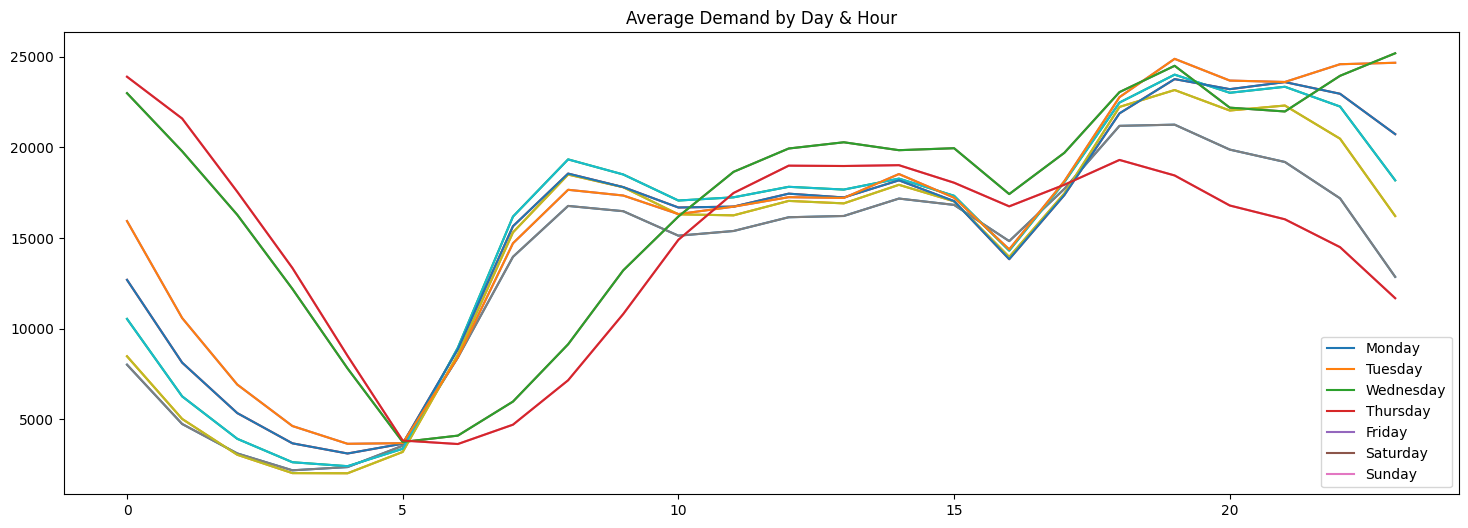

In [9]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(18, 6), dpi=100)
x = np.linspace(0, 20, 24)
by_weekday = df.groupby(['hour','DayOfTheWeek']).mean()['value'].unstack()
plt.plot(by_weekday[0.0], label="Monday")
plt.plot(by_weekday[1.0], label="Tuesday")
plt.plot(by_weekday[2.0], label="Wednesday")
plt.plot(by_weekday[3.0], label="Thursday")
plt.plot(by_weekday[4.0], label="Friday")
plt.plot(by_weekday[5.0], label="Saturday")
plt.plot(by_weekday[6.0], label="Sunday")
plt.legend(loc="lower right")
plt.plot(by_weekday)
plt.title ("Average Demand by Day & Hour")
plt.show()

In [10]:
def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

<Axes: >

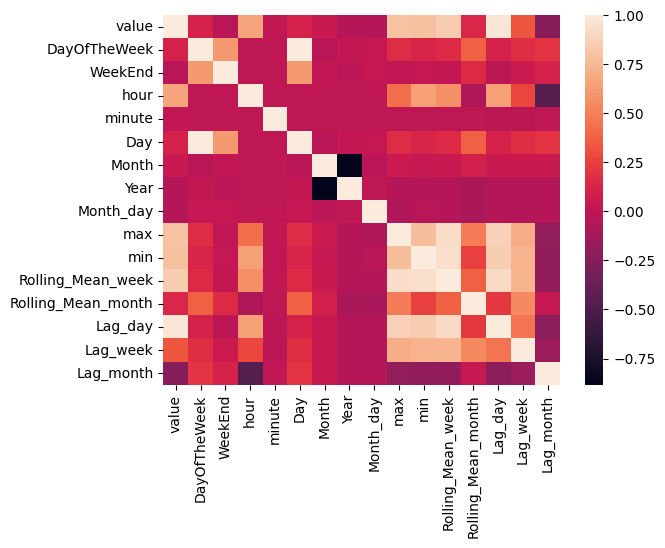

In [11]:
import seaborn as sns
corr = df.select_dtypes('number').corr()

# plot the heatmap
sns.heatmap(corr)

In [12]:
# cmap = sns.heatmap(corr, cmap="Blues", annot=True)
# cmap = sns.heatmap(corr)


cmap = sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .format(precision=3)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_table_styles(magnify())

,value,DayOfTheWeek,WeekEnd,hour,minute,Day,Month,Year,Month_day,max,min,Rolling_Mean_week,Rolling_Mean_month,Lag_day,Lag_week,Lag_month
value,1.000,0.107,-0.023,0.659,0.008,0.107,0.046,-0.044,-0.045,0.800,0.792,0.839,0.135,0.971,0.333,-0.242
DayOfTheWeek,0.107,1.000,0.608,-0.000,0.000,1.000,-0.022,0.020,0.025,0.166,0.131,0.148,0.368,0.117,0.169,0.199
WeekEnd,-0.023,0.608,1.000,0.000,-0.000,0.608,0.012,-0.012,0.023,0.013,0.027,0.020,0.154,-0.005,0.054,0.112
hour,0.659,-0.000,0.000,1.000,-0.000,-0.000,0.000,-0.000,-0.000,0.428,0.636,0.562,-0.063,0.632,0.274,-0.467
minute,0.008,0.000,-0.000,-0.000,1.000,0.000,0.000,0.000,-0.000,0.005,0.004,0.001,0.000,-0.007,-0.008,0.007
Day,0.107,1.000,0.608,-0.000,0.000,1.000,-0.022,0.020,0.025,0.166,0.131,0.148,0.368,0.117,0.169,0.199
Month,0.046,-0.022,0.012,0.000,0.000,-0.022,1.000,-0.883,-0.008,0.052,0.040,0.050,0.099,0.046,0.046,0.049
Year,-0.044,0.020,-0.012,-0.000,0.000,0.020,-0.883,1.000,0.006,-0.051,-0.041,-0.048,-0.092,-0.044,-0.044,-0.047
Month_day,-0.045,0.025,0.023,-0.000,-0.000,0.025,-0.008,0.006,1.000,-0.071,-0.029,-0.049,-0.088,-0.045,-0.046,-0.044
max,0.800,0.166,0.013,0.428,0.005,0.166,0.052,-0.051,-0.071,1.000,0.774,0.932,0.486,0.870,0.693,-0.189


Model

In [13]:
#Clear nulls
df.dropna(inplace=True)

KMeans

In [14]:
from sklearn import preprocessing
from sklearn.decomposition import PCA

data = df[['value', 'hour', 'DayOfTheWeek','WeekEnd','minute','Day','Month','Year','Month_day','max','min','Rolling_Mean_week','Rolling_Mean_month','Lag_day','Lag_week','Lag_month']]
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data)
data  = pd.DataFrame(np_scaled)
# reduce to 2 importants features
pca = PCA(n_components=2)
data = pca.fit_transform(data)
# standardize these 2 new features
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)

In [15]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

for n_cluster in range(2, 20):
    kmeans = KMeans(n_clusters=n_cluster,n_init=10).fit(data)
    label = kmeans.labels_
    sil_coeff = silhouette_score(data, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.3685580369459493
For n_clusters=3, The Silhouette Coefficient is 0.41038199770927014
For n_clusters=4, The Silhouette Coefficient is 0.3732773351222885
For n_clusters=5, The Silhouette Coefficient is 0.36747689512063586
For n_clusters=6, The Silhouette Coefficient is 0.41255891613336043
For n_clusters=7, The Silhouette Coefficient is 0.4067846605179497
For n_clusters=8, The Silhouette Coefficient is 0.393813686314708
For n_clusters=9, The Silhouette Coefficient is 0.38471607624092147
For n_clusters=10, The Silhouette Coefficient is 0.38784096220068776
For n_clusters=11, The Silhouette Coefficient is 0.38816739034061964
For n_clusters=12, The Silhouette Coefficient is 0.37129584986996467
For n_clusters=13, The Silhouette Coefficient is 0.3795811668223738
For n_clusters=14, The Silhouette Coefficient is 0.37948889007622005
For n_clusters=15, The Silhouette Coefficient is 0.37678559111305365
For n_clusters=16, The Silhouette Coefficient is

As we can see, n_clusters=6 has highest Silhouette Coefficient. This means that 7 should be the optimal number of cluster

In [16]:
n_cluster = range(2, 20)
kmeans = [KMeans(n_clusters=i,n_init=10).fit(data) for i in n_cluster]

In [17]:
df['cluster'] = kmeans[6].predict(data)
df['principal_feature1'] = data[0]
df['principal_feature2'] = data[1]

df['cluster'].value_counts()

cluster
7    2113
0    1731
3    1247
6    1224
5    1186
4    1152
2    1130
1     507
Name: count, dtype: int64

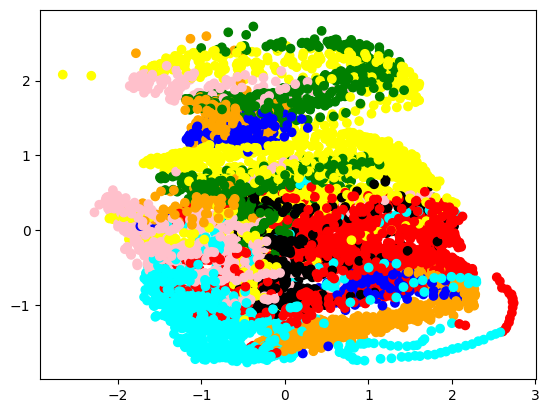

In [18]:
#different clusters
fig, ax = plt.subplots()
colors = {0:'red', 1:'blue', 2:'green', 3:'pink', 4:'black', 5:'orange', 6:'cyan', 7:'yellow', 8:'brown', 9:'purple', 10:'white', 11: 'grey', 12:'lightblue', 13:'lightgreen', 14: 'darkgrey'}
ax.scatter(df['principal_feature1'], df['principal_feature2'], c=df["cluster"].apply(lambda x: colors[x]))
plt.show()

In [19]:
def getDistanceByPoint(data, model):
    distance = pd.Series()
    for i in range(0,len(data)):
        Xa = np.array(data.loc[i])
        Xb = model.cluster_centers_[model.labels_[i]-1]
        distance.at[i] = np.linalg.norm(Xa-Xb)
    return distance
outliers_fraction = 0.01
# get the distance between each point and its nearest centroid. The biggest distances are considered as anomaly
distance = getDistanceByPoint(data, kmeans[12])
number_of_outliers = int(outliers_fraction*len(distance))
threshold = distance.nlargest(number_of_outliers).min()
# anomaly21 contain the anomaly result of method 2.1 Cluster (0:normal, 1:anomaly) 
df['anomaly21'] = (distance >= threshold).astype(int)

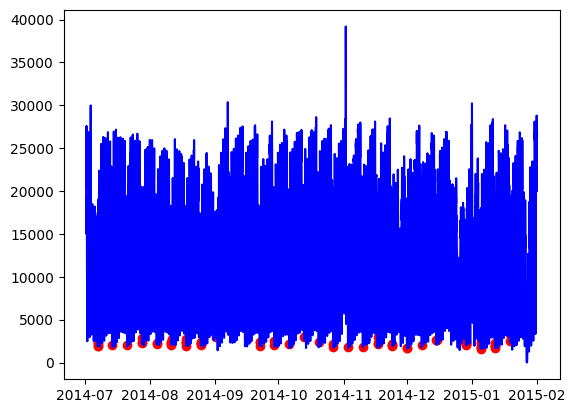

In [20]:
# visualisation of anomaly throughout time (viz 1)
fig, ax = plt.subplots()

a = df.loc[df['anomaly21'] == 1, ['timestamp', 'value']] #anomaly

ax.plot(df['timestamp'], df['value'], color='blue')
ax.scatter(a['timestamp'],a['value'], color='red')
plt.show()

Isolation Forest

In [21]:
# from sklearn.ensemble import IsolationForest
# def run_isolation_forest(model_data: pd.DataFrame, contamination=0.005, n_estimators=200, max_samples=0.7) -> pd.DataFrame:
    
#     IF = (IsolationForest(random_state=0,
#                           contamination=contamination,
#                           n_estimators=n_estimators,
#                           max_samples=max_samples)
#          )
    
#     IF.fit(model_data)
    
#     output = pd.Series(IF.predict(model_data)).apply(lambda x: 1 if x == -1 else 0)
    
#     score = IF.decision_function(model_data)
    
#     return output, score

In [22]:
model_data = df[['value', 'hour', 'DayOfTheWeek','WeekEnd','minute','Day','Month','Year','Month_day','max','min','Rolling_Mean_week','Rolling_Mean_month','Lag_day','Lag_week','Lag_month','timestamp']].set_index('timestamp').dropna()
model_data.head()

,value,hour,DayOfTheWeek,WeekEnd,minute,Day,Month,Year,Month_day,max,min,Rolling_Mean_week,Rolling_Mean_month,Lag_day,Lag_week,Lag_month
timestamp,,,,,,,,,,,,,,,,
2014-07-01 15:00:00,19380,15,1,0,0,1,7,2014,1,20591.0,18178.0,19278.285714,12464.666667,20591.0,18463.0,10844.0
2014-07-01 15:30:00,18544,15,1,0,30,1,7,2014,1,20591.0,18178.0,19226.285714,12811.900000,19380.0,18908.0,8127.0
2014-07-01 16:00:00,16228,16,1,0,0,1,7,2014,1,20591.0,16228.0,18846.571429,13145.833333,18544.0,18886.0,6210.0
2014-07-01 16:30:00,15013,16,1,0,30,1,7,2014,1,20591.0,15013.0,18394.428571,13491.066667,16228.0,18178.0,4656.0
2014-07-01 17:00:00,17203,17,1,0,0,1,7,2014,1,20591.0,15013.0,18072.142857,13937.166667,15013.0,19459.0,3820.0


In [23]:
# outliers, score = run_isolation_forest(model_data)

In [24]:
from sklearn.ensemble import IsolationForest
IF = IsolationForest(random_state=0, contamination=0.005, n_estimators=200, max_samples=0.7)
IF.fit(model_data)

# New Outliers Column
df['Outliers'] = pd.Series(IF.predict(model_data)).apply(lambda x: 1 if x == -1 else 0)

# Get Anomaly Score
score = IF.decision_function(model_data)

# New Anomaly Score column
df['Score'] = score

df.head()

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



,timestamp,value,DayOfTheWeek,WeekEnd,hour,minute,Day,Month,Year,Month_day,...,Rolling_Mean_month,Lag_day,Lag_week,Lag_month,cluster,principal_feature1,principal_feature2,anomaly21,Outliers,Score
30,2014-07-01 15:00:00,19380,1,0,15,0,1,7,2014,1,...,12464.666667,20591.0,18463.0,10844.0,4,1.692435,-0.104426,0.0,0.0,0.141190
31,2014-07-01 15:30:00,18544,1,0,15,30,1,7,2014,1,...,12811.900000,19380.0,18908.0,8127.0,4,1.401696,-0.205115,0.0,0.0,0.149769
32,2014-07-01 16:00:00,16228,1,0,16,0,1,7,2014,1,...,13145.833333,18544.0,18886.0,6210.0,4,1.099925,-0.346864,0.0,0.0,0.149400
33,2014-07-01 16:30:00,15013,1,0,16,30,1,7,2014,1,...,13491.066667,16228.0,18178.0,4656.0,0,0.821813,-0.429098,0.0,0.0,0.153212
34,2014-07-01 17:00:00,17203,1,0,17,0,1,7,2014,1,...,13937.166667,15013.0,19459.0,3820.0,0,0.551812,-0.455430,0.0,0.0,0.146835


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
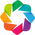

:Overlay
   .Points.I :Points   [timestamp,value]   (DayOfTheWeek,WeekEnd,hour,minute,Day,Month,Year,Month_day,max,min,Rolling_Mean_week,Rolling_Mean_month,Lag_day,Lag_week,Lag_month,cluster,principal_feature1,principal_feature2,anomaly21,Outliers,Score)
   .Curve.I  :Curve   [timestamp]   (value,DayOfTheWeek,WeekEnd,hour,minute,Day,Month,Year,Month_day,max,min,Rolling_Mean_week,Rolling_Mean_month,Lag_day,Lag_week,Lag_month,cluster,principal_feature1,principal_feature2,anomaly21,Outliers,Score)

In [25]:
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')

hv.Points(df.query("Outliers == 1")).opts(size=10, color='#ff0000') * hv.Curve(df).opts(opts.Curve(title="New York City Taxi Demand Anomalies", xlabel="", ylabel="Demand" , height=300, responsive=True,tools=['hover','box_select', 'lasso_select', 'tap'],show_grid=True))